In [ ]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Load the dataset
df = pd.read_csv("Heart Attack.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df.columns

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().any()

In [ ]:
df.info()

In [ ]:
df.describe().round(3)

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:",numerical_columns)

object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:",object_columns)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Bar(x=df[i].value_counts().index, y=df[i].value_counts(),uid =None)])
    fig.update_layout(
        title=i,
        xaxis_title=i,
        yaxis_title="Count")
    fig.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [ ]:
for i in numerical_columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

In [ ]:
for i in numerical_columns:
    fig = go.Figure(data=[go.Histogram(x=df[i], nbinsx=20)])
    fig.update_layout(
        title=f'Histogram of {i}',
        xaxis_title=i,
        yaxis_title="Count"
    )
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))
    fig.show()

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
# Compute correlation matrix
corr = numeric_df.corr()

# Create mask and plot
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(14, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Encode target column
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])  # positive -> 1, negative -> 0

# Features and target
X = df.drop('class', axis=1)
y = df['class']

In [ ]:

# Check original class distribution
print("Full class distribution:")
print(y.value_counts())


In [ ]:
# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("y_train class distribution:")
print(pd.Series(y_train).value_counts())
print("y_test class distribution:")
print(pd.Series(y_test).value_counts())

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_acc:.2f}")
print("Confusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, log_pred))

In [ ]:
cm = confusion_matrix(y_test, log_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print("Confusion Matrix - Random Forest:")
print(confusion_matrix(y_test, rf_pred))

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc:.2f}")
print("Confusion Matrix - SVM:")
print(confusion_matrix(y_test, svm_pred))


In [ ]:
cm_svm = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='pink', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Voting classifier
log_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('svm', svm_clf)],
    voting='soft'
)
voting_clf.fit(X_train_scaled, y_train)
vote_pred = voting_clf.predict(X_test_scaled)
vote_acc = accuracy_score(y_test, vote_pred)
print(f"Voting Classifier Accuracy: {vote_acc:.2f}")
print("Confusion Matrix - Voting Classifier:")
print(confusion_matrix(y_test, vote_pred))

# 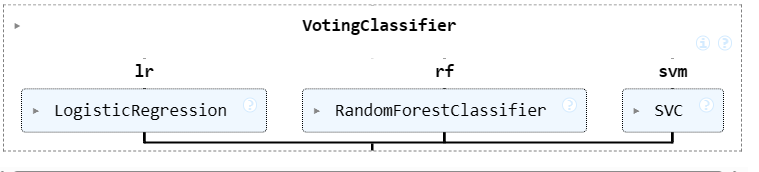

In [ ]:
cm_vote = confusion_matrix(y_test, vote_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_vote, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Positive:-The Person has Heart Disease
# Nagative:-The Person does NOT have Heart Disease

In [ ]:
# Collect user input for prediction
print("Please input the following features:")
input_features = {}

for col in X.columns:
    value = float(input(f"{col}: "))
    input_features[col] = value

input_df = pd.DataFrame([input_features])
input_scaled = scaler.transform(input_df)
prediction = voting_clf.predict(input_scaled)
print("Predicted Class:", le.inverse_transform(prediction)[0])

